Setup

In [1]:
!pip install Streamlit
!pip install seaborn
!pip install imblearn 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#defining function to produce frequency tables
# Create a function to generate with frequency and percentage totals
def freq_percent_table(df, column):
    # Exclude missing values
    df_filtered = df.dropna(subset=[column])

    # Count values
    table = df_filtered[column].value_counts().reset_index()

    # Rename columns
    table.columns = [column, 'Count']

    # Sort values by the specified column
    table = table.sort_values(by=column)

    # Calculate total count
    total_count = len(df_filtered)

    # Calculate percentage
    table['Percent'] = (table['Count'] / total_count).round(2) * 100

    # Create a row for the total count
    total = pd.DataFrame({column: ['Total'], 'Count': [total_count], 'Percent': [100.0]})

    # Concatenate the table and the total row
    table = pd.concat([table, total], ignore_index=True)
    return table

In [4]:
data = pd.read_csv('predictive_maintenance.csv')

In [5]:
df = data.copy()

Inspecting data

In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [7]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [8]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [12]:
df.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

recode productID:
consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number. The letter corresponds to type, so remove from product ID

In [13]:
df['Product ID'].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [14]:
data['Product ID'] = data['Product ID'].apply(lambda x: x[1:])
data['Product ID'] = pd.to_numeric(data['Product ID'])

c:\Users\HP\samle-data\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


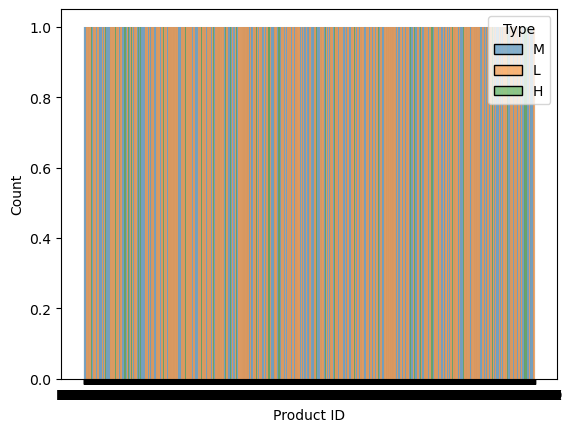

In [15]:
# Histogram of ProductID by Type
sns.histplot(data=df, x='Product ID', hue='Type')
plt.show()

In [16]:
n = df.shape[0]

print('Check for duplicate values:',
      df['Product ID'].unique().shape[0]!=n)

Check for duplicate values: False


In [17]:
# Drop ID columns
df1 = df.copy()
df1.drop(columns=['UDI','Product ID'], inplace=True)

df1

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [18]:
freq_percent_table(df1, 'Type')

,Type,Count,Percent
0,H,1003,10.0
1,L,6000,60.0
2,M,2997,30.0
3,Total,10000,100.0


Anomaly detection

There are several kind of machine failures. However, there is one called random failure and there are 18 cases. I will decide to remove them because they provide not enough information and also the target was 0 meaning that it must be an error or something like that.

In [19]:
df1['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [20]:
count = (df1['Failure Type'] == 'Random Failures').sum()
count

18

In [21]:
df1[df1['Failure Type'] == 'Random Failures']

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [22]:
df1 = df1[df1['Failure Type'] != 'Random Failures']

In [23]:
ambi = df1.loc[(df['Target']==1) & (df1['Failure Type']=='No Failure')].index
ambi

Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [24]:
df1.drop(index=ambi, inplace=True)
df1

C:\Users\HP\AppData\Local\Temp\ipykernel_22104\377306681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=ambi, inplace=True)


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


outliers

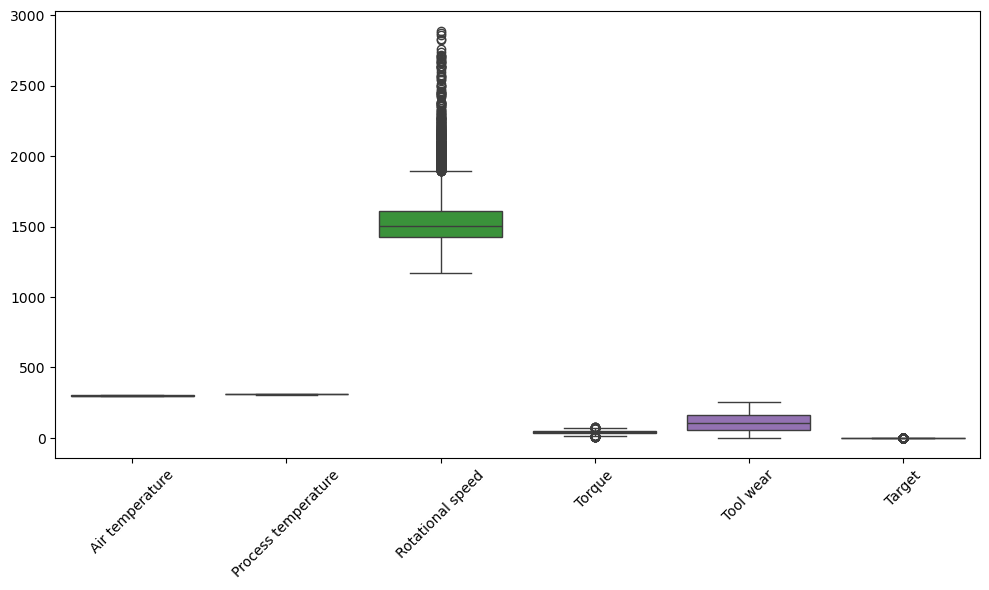

In [25]:
continuous_vars = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))  # Adjust the size as per your need
sns.boxplot(data=continuous_vars)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.tight_layout()  # Adjusts subplot params for the subplot(s) to fit in to the figure area
plt.show()

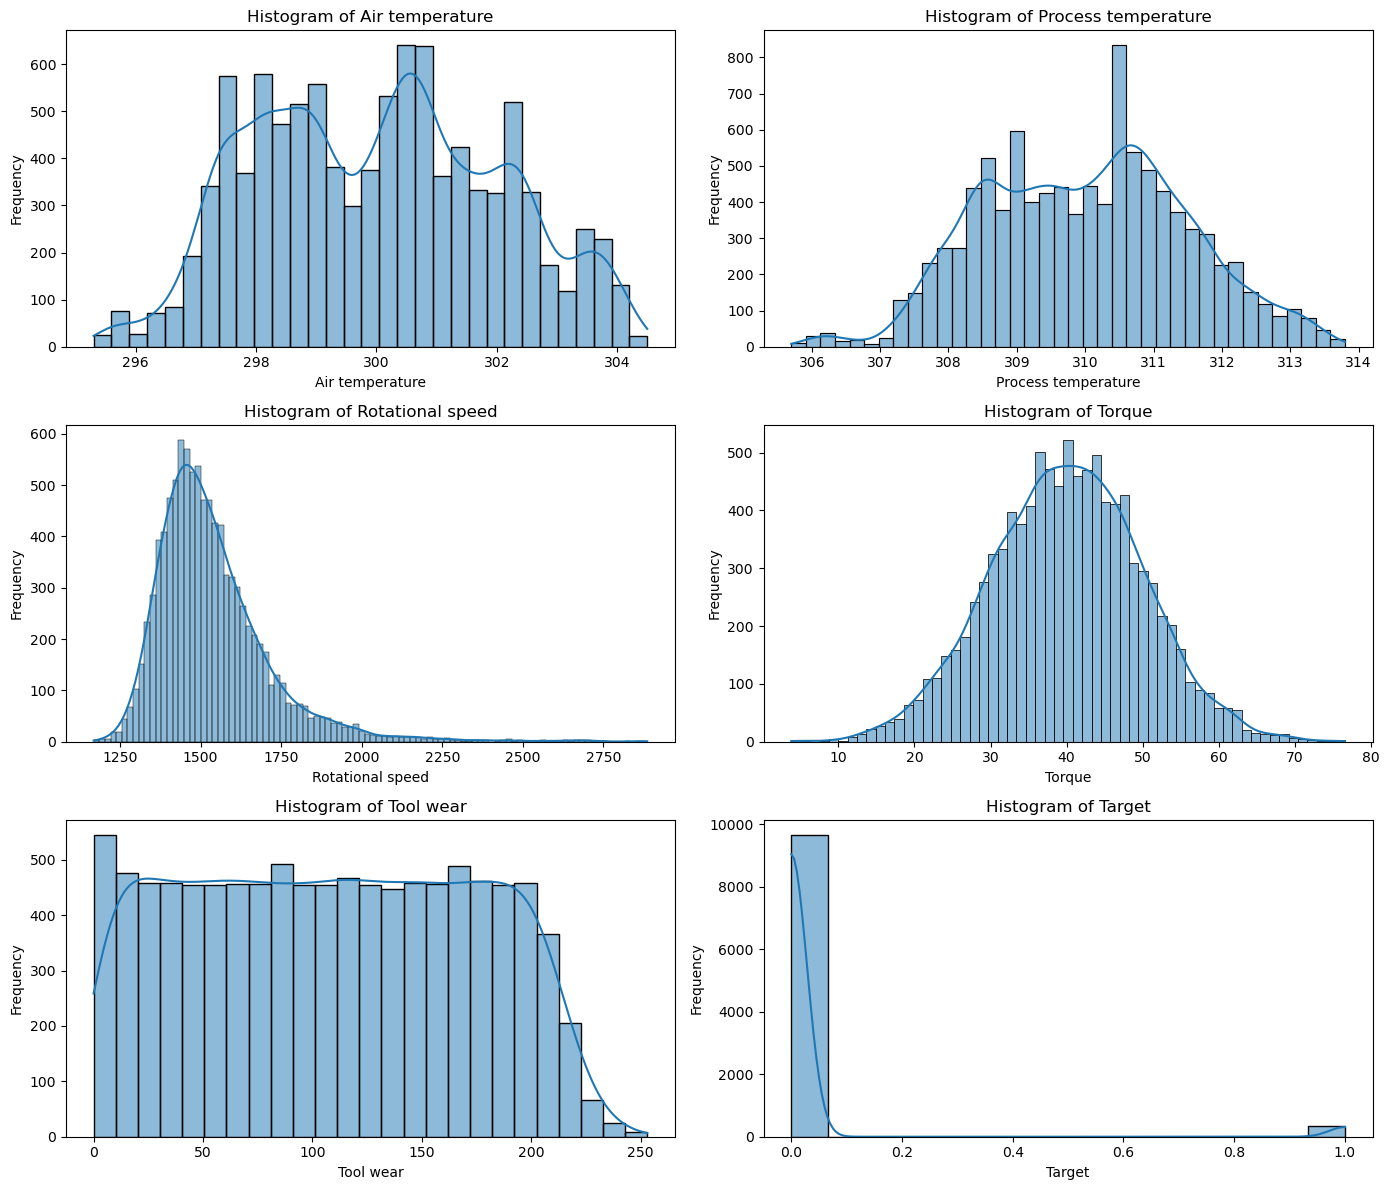

In [26]:
n_vars = len(continuous_vars.columns)
n_rows = int(np.ceil(n_vars / 2))  # Adjust the number of rows as needed
fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the grid to 1D array for easy indexing

# Plot each variable in its subplot
for i, column in enumerate(continuous_vars.columns):
    sns.histplot(continuous_vars[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# If the number of variables is odd, the last subplot will be empty, so you can hide it
if n_vars % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Split data

In [27]:
#Split df_1 into test and train sets

y = df1['Target']
X = df1.drop('Target', axis=1)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':  # Assuming object dtype implies categorical
        X[column] = encoder.fit_transform(X[column])



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
print(X_train.dtypes)

Type                     int32
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Failure Type             int32
dtype: object


# Balance data

From some readings online, I will balance the data before scaling.

In [30]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE on the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now X_train_smote and y_train_smote have balanced classes

## Post balance

In [31]:
freq_percent_table(X_train_smote, 'Failure Type')

,Failure Type,Count,Percent
0,0,2276,16.0
1,1,7837,54.0
2,2,2051,14.0
3,3,1643,11.0
4,4,667,5.0
5,Total,14474,100.0


## pre balance

In [32]:
freq_percent_table(data, 'Failure Type')

,Failure Type,Count,Percent
0,Heat Dissipation Failure,112,1.0
1,No Failure,9652,97.0
2,Overstrain Failure,78,1.0
3,Power Failure,95,1.0
4,Random Failures,18,0.0
5,Tool Wear Failure,45,0.0
6,Total,10000,100.0


In [33]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [34]:
y_train_smote.value_counts()

Target
0    7237
1    7237
Name: count, dtype: int64

## inspecting fails

In [35]:
Fails = df1[df1['Target'] == 1]
Fails

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [36]:
freq_percent_table(Fails, 'Failure Type')

,Failure Type,Count,Percent
0,Heat Dissipation Failure,112,34.0
1,Overstrain Failure,78,24.0
2,Power Failure,95,29.0
3,Tool Wear Failure,45,14.0
4,Total,330,100.0


Models

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()
svc = SVC(decision_function_shape='ovr')
rfc = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Adjust XGB parameters to avoid warnings


In [39]:
knn = KNeighborsClassifier()
svc = SVC(decision_function_shape='ovr')
rfc = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Adjust XGB parameters to avoid warnings


In [40]:
# Train KNN
knn.fit(X_train_smote, y_train_smote)

# Train SVC
svc.fit(X_train_smote, y_train_smote)

# Train RFC
rfc.fit(X_train_smote, y_train_smote)

# Train XGB
xgb.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True, decision_function_shape='ovr'),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Prepare a dictionary to hold the performance metrics
performance_metrics = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Iterate over classifiers, train, predict and calculate metrics
for name, clf in classifiers.items():
    # Training the model
    clf.fit(X_train_smote, y_train_smote)

    # Making predictions
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:  # Use decision function if predict_proba is not available
        y_proba = clf.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Scale to [0, 1]

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Consider using 'binary' for binary classification
    auc_roc = roc_auc_score(y_test, y_proba)

    # Storing metrics
    performance_metrics["Model"].append(name)
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["F1 Score"].append(f1)
    performance_metrics["AUC-ROC"].append(auc_roc)

# Convert the performance metrics into a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(performance_metrics)
results_df


,Model,Accuracy,F1 Score,AUC-ROC
0,Logistic Regression,0.866480,0.904007,0.929003
1,K-Nearest Neighbors,0.904170,0.926366,0.829767
2,Support Vector Classifier,0.809142,0.867742,0.884120
3,Random Forest,0.993585,0.993841,0.999995
4,XGBoost,0.992783,0.993104,1.000000


# With scaled data

In [42]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

# Initialize the scaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True, decision_function_shape='ovr'),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Prepare a dictionary to hold the performance metrics
performance_metrics = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Iterate over classifiers, train, predict and calculate metrics
for name, clf in classifiers.items():
    # Training the model
    clf.fit(X_train_scaled, y_train_smote)

    # Making predictions
    y_pred = clf.predict(X_test_scaled)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    else:  # Use decision function if predict_proba is not available
        y_proba = clf.decision_function(X_test_scaled)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Scale to [0, 1]

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Consider using 'binary' for binary classification
    auc_roc = roc_auc_score(y_test, y_proba)

    # Storing metrics
    performance_metrics["Model"].append(name)
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["F1 Score"].append(f1)
    performance_metrics["AUC-ROC"].append(auc_roc)

# Convert the performance metrics into a DataFrame for better visualization
results_df = pd.DataFrame(performance_metrics)
results_df


,Model,Accuracy,F1 Score,AUC-ROC
0,Logistic Regression,0.867682,0.904687,0.925815
1,K-Nearest Neighbors,0.986367,0.987422,0.998753
2,Support Vector Classifier,0.989575,0.990218,0.999731
3,Random Forest,0.994387,0.994585,0.999998
4,XGBoost,0.992783,0.993104,1.000000


KNN improved the most. Top performing models are still XGBoost and Random Forest.

Parameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV


# Initialize the scaler and scale the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define the models and their respective parameter grids
models_and_parameters = {
    LogisticRegression(max_iter=1000): {
        'C': [0.1, 1, 10]
    },
    KNeighborsClassifier(): {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    SVC(probability=True): {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    RandomForestClassifier(): {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]
    },
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'): {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1]
    }
}

# Prepare a dictionary to store the best models and their scores
tuned_performance_metrics = {
    "Model": [],
    "Best Parameters": [],
    "Accuracy": [],
    "F1 Score": [],
    "AUC-ROC": []
}

# Iterate over the models and parameters, applying GridSearchCV for tuning
for model, params in models_and_parameters.items():
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train_smote)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = best_model.decision_function(X_test_scaled)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # Storing the best model and performance metrics
    tuned_performance_metrics["Model"].append(best_model.__class__.__name__)
    tuned_performance_metrics["Best Parameters"].append(grid.best_params_)
    tuned_performance_metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    tuned_performance_metrics["F1 Score"].append(f1_score(y_test, y_pred, average='weighted'))
    tuned_performance_metrics["AUC-ROC"].append(roc_auc_score(y_test, y_proba))

# Convert the performance metrics into a DataFrame for better visualization
tuned_results_df = pd.DataFrame(tuned_performance_metrics)
tuned_results_df


,Model,Best Parameters,Accuracy,F1 Score,AUC-ROC
0,LogisticRegression,{'C': 10},0.867682,0.904687,0.925844
1,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance'}",0.987169,0.988113,0.997506
2,SVC,"{'C': 10, 'kernel': 'rbf'}",0.989976,0.990573,0.999830
3,RandomForestClassifier,"{'max_depth': 20, 'n_estimators': 100}",0.993585,0.993841,1.000000
4,XGBClassifier,"{'learning_rate': 0.1, 'n_estimators': 200}",0.993585,0.993841,1.000000


# Deploying model on Streamlit

saving the best two models from above.

In [44]:
# Step 1: Train Your Models with Best Parameters

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the models with the best parameters
best_rf = RandomForestClassifier(max_depth=20, n_estimators=100)
best_xgb = XGBClassifier(learning_rate=0.1, n_estimators=200, use_label_encoder=False, eval_metric='mlogloss')

# Fit the models on your training data
best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
# Step 2: Save the Trained Models

import joblib

# Save the trained models to disk
joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(best_xgb, 'best_xgboost_model.pkl')


['best_xgboost_model.pkl']

In [68]:
# Step 3: Load and Verify the Saved Models

# Load the models from disk
loaded_rf = joblib.load('best_random_forest_model.pkl')
loaded_xgb = joblib.load('best_xgboost_model.pkl')

# Make predictions to test if the loaded models are working as expected (use your test data here)
predictions_rf = loaded_rf.predict(X_test)
predictions_xgb = loaded_xgb.predict(X_test)


In [1]:
import streamlit as st
import numpy as np
import joblib

# Load the trained models
loaded_rf = joblib.load('best_random_forest_model.pkl')
loaded_xgb = joblib.load('best_xgboost_model.pkl')

# Streamlit app title
st.title('Machine Learning Model Predictions')

# Model selection
model_option = st.selectbox('Select the model you want to use:', ['RandomForestClassifier', 'XGBClassifier'])

# Assuming you need inputs for features to make a prediction
# Here you should include input fields corresponding to the features of your dataset
# This is a generic template; you'll need to adjust it based on your specific feature set
feature_1 = st.number_input('Type', format='%f')
feature_2 = st.number_input('Failure Type', format='%f')
# Add more input fields as required for your model

# The 'Predict' button
if st.button('Predict'):
    input_data = np.array([[feature_1, feature_2]])  # Adjust this depending on the number of features
    if model_option == 'RandomForestClassifier':
        prediction = loaded_rf.predict(input_data)
    elif model_option == 'XGBClassifier':
        prediction = loaded_xgb.predict(input_data)
    
    st.write(f'The predicted output is: {prediction}')


2024-03-14 18:59:30.885 
  command:

    streamlit run c:\Users\HP\samle-data\env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
!streamlit run c:\Users\HP\samle-data\env\lib\site-packages\ipykernel_launcher.py

^C


In [ ]:
from pyngrok import ngrok

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url


In [ ]:
!pip install pyngrok
